# Testing with All SR Model (KMG1_v1)
John Ignacio R.M. 2020-06-03

In [1]:
ada_parent_dir = "../"
import sys
sys.path.append(ada_parent_dir)
from ada import get_trainvaltest_from_csv, KerasModelGamma
from glob import glob
import pandas as pd

Welcome to JupyROOT 6.20/04
Using TensorFlow backend.


In [2]:
data_path = "../processed_data"
signal = "Xtohh2000"
seed = 420
n_features = 14

In [3]:
model = KerasModelGamma(n_features)
model.load(data_path, "1", model_name = "KMG1")

2020-06-04 19:56:05.714115: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-06-04 19:56:05.806261: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-06-04 19:56:05.806678: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GeForce GTX 960M computeCapability: 5.0
coreClock: 1.176GHz coreCount: 5 deviceMemorySize: 1.96GiB deviceMemoryBandwidth: 74.65GiB/s
2020-06-04 19:56:05.806764: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2020-06-04 19:56:05.806846: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2020-06-04 19:56:05.986692: I tensorflow/stream_executor/platform/def

In [7]:
sets = get_trainvaltest_from_csv(data_path, signal, .6, .2, .2, 420, region = "SR")

In [8]:
X_test_tags = [sets["x"]["test"][sets["tag"]["test"] == tag] for tag in [0, 1, 2]]
y_test_tags = [sets["y"]["test"][sets["tag"]["test"] == tag] for tag in [0, 1, 2]]
w_test_tags = [sets["w"]["test"][sets["tag"]["test"] == tag] for tag in [0, 1, 2]]
for X_test_tag in X_test_tags:
    print(X_test_tag.shape)

(8900, 14)
(2991, 14)
(1673, 14)


In [9]:
for tag in [0, 1, 2]:
    print(f"\nEvaluation Tag {tag}\n")
    model.evaluate(X_test_tags[tag], y_test_tags[tag])


Evaluation Tag 0

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      7914
           1       0.69      0.75      0.72       986

    accuracy                           0.93      8900
   macro avg       0.83      0.86      0.84      8900
weighted avg       0.94      0.93      0.94      8900

Confussion Matrix
[[7575  339]
 [ 242  744]]

Evaluation Tag 1

Classification Report
              precision    recall  f1-score   support

           0       0.60      0.97      0.74       646
           1       0.99      0.82      0.90      2345

    accuracy                           0.85      2991
   macro avg       0.79      0.89      0.82      2991
weighted avg       0.90      0.85      0.86      2991

Confussion Matrix
[[ 624   22]
 [ 419 1926]]

Evaluation Tag 2

Classification Report
              precision    recall  f1-score   support

           0       0.11      0.96      0.19        27
           1       1.00 

In [10]:
for tag in [0, 1, 2]:
    print(f"\nEvaluation Tag {tag}\n")
    model.evaluate_with_weights(X_test_tags[tag], y_test_tags[tag], w_test_tags[tag])


Evaluation Tag 0

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.98      0.99 50.93476119180759
           1       0.54      0.76      0.63 1.385057287005463

    accuracy                           0.98 52.319818478813055
   macro avg       0.77      0.87      0.81 52.319818478813055
weighted avg       0.98      0.98      0.98 52.319818478813055

Confussion Matrix
[[50.02489171  0.90986948]
 [ 0.32988721  1.05517007]]

Evaluation Tag 1

Classification Report
              precision    recall  f1-score   support

           0       0.93      1.01      0.97 6.760740182899293
           1       1.02      0.82      0.91 3.024463661940256

    accuracy                           0.95 9.785203844839549
   macro avg       0.98      0.91      0.94 9.785203844839549
weighted avg       0.96      0.95      0.95 9.785203844839549

Confussion Matrix
[[ 6.82073809 -0.05999791]
 [ 0.54326382  2.48119984]]

Evaluation Tag 2

Classification R


Evaluation Tag 0



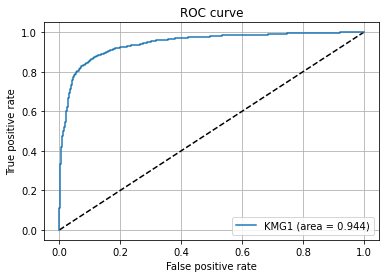


Evaluation Tag 1



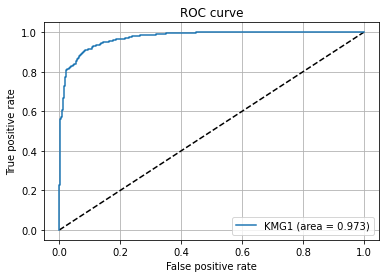


Evaluation Tag 2



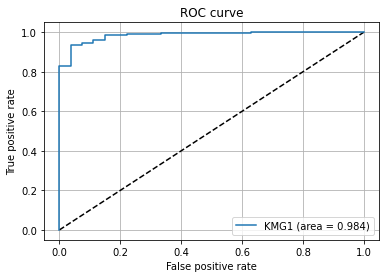

In [11]:
for tag in [0, 1, 2]:
    print(f"\nEvaluation Tag {tag}\n")
    model.plot_roc(X_test_tags[tag], y_test_tags[tag])


Evaluation Tag 0



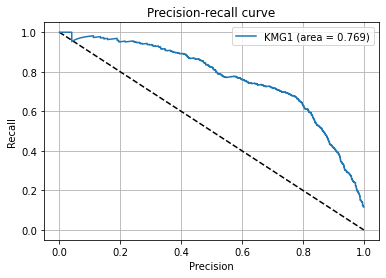


Evaluation Tag 1



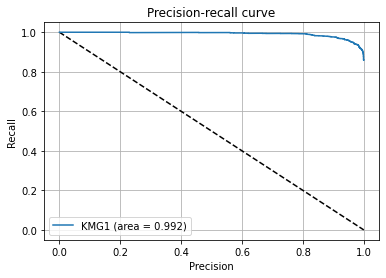


Evaluation Tag 2



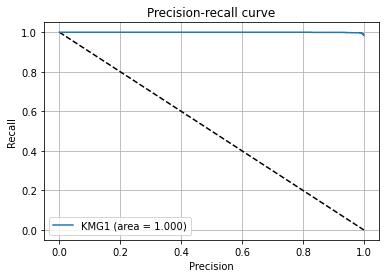

In [12]:
for tag in [0, 1, 2]:
    print(f"\nEvaluation Tag {tag}\n")
    model.plot_recall(X_test_tags[tag], y_test_tags[tag])